## Phineus - FFT

Phineus is a Python library designed for encrypted time series forecasting. Inspired by Meta's Prophet, Phineus provides functionalities for encrypted Fast Fourier Transform (FFT) and encrypted rolling average calculations, protecting the privacy of your time series data during the forecasting process.

Phineus is named after the blind prophet in Greek mythology. While blinded, Phineus retained his ability to see the future. Using fully homomorphic encryption, Phineus can perform computations on encrypted time series data, forecasting the future without ever decrypting the actual data.


In [ ]:
from venumML.venumpy import small_glwe as vp
import numpy as np
import matplotlib.pyplot as plt

from venumML.time_series.Phineus import phineus_FFT

In [2]:
# Set security level (adjust as needed)
ctx = vp.SecretContext()
ctx.precision = 6

#### Plaintext FFT:

The input sequence for the FFT is in its original, unencrypted form. This means the numbers representing the signal are directly processed by the FFT algorithm.

This approach is simple, as standard FFT algorithms can be applied directly.
However, it lacks privacy protection. If the input sequence contains sensitive data, anyone performing the FFT would have access to the original values.


The code below demonstrates a basic example of performing the Fast Fourier Transform (FFT) on a simple sequence using the numpy library.

In [3]:
# Define the input sequence
input_sequence = np.sin(8*2*np.pi*np.linspace(0,1,128))#np.array([1, 0, -1, 0])

# Perform FFT using numpy
fft_result = np.fft.fft(input_sequence)
# fft_result

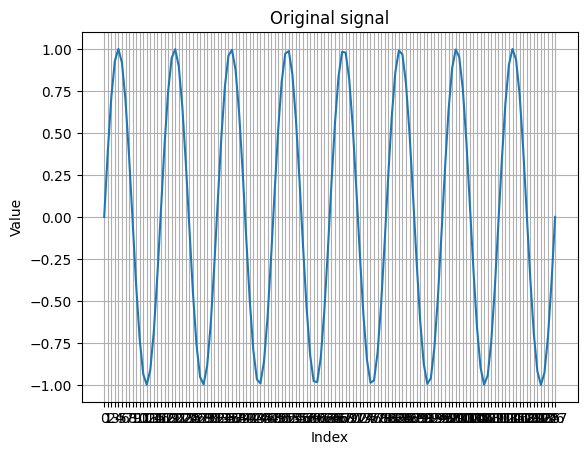

In [4]:
# Assuming fft_result is a numpy array of complex numbers
# Since it's a small array, plot real and imaginary parts separately
plt.plot(input_sequence)

# Customize the plot for clarity
plt.xlabel("Index")
plt.ylabel("Value")
title = "Original signal"  
plt.title(title)
plt.xticks(np.arange(len(fft_result)))  # Set x-ticks for each element
plt.grid(True)  # Add grid for better visualization
# plt.legend()  # Add legend for real and imaginary parts

plt.show()

#### Numpy FFT Plot

The below plot visualizes the real (blue line) and imaginary (orange line) components of the Fast Fourier Transform (FFT) result. The FFT decomposes a signal into its frequency components. Here, the real and imaginary parts represent the cosine and sine contributions of each frequency, respectively. Analyzing the peaks and troughs helps identify dominant frequencies in the signal.

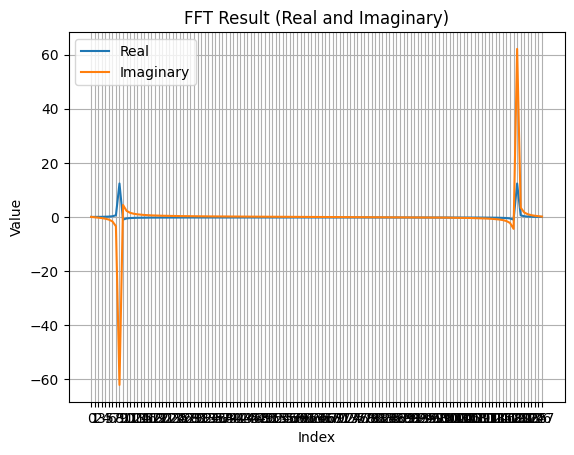

In [5]:
# Assuming fft_result is a numpy array of complex numbers
# Since it's a small array, plot real and imaginary parts separately
plt.plot(fft_result.real, label='Real')
plt.plot(fft_result.imag, label='Imaginary')

# Customize the plot for clarity
plt.xlabel("Index")
plt.ylabel("Value")
title = "FFT Result (Real and Imaginary)"  
plt.title(title)
plt.xticks(np.arange(len(fft_result)))  # Set x-ticks for each element
plt.grid(True)  # Add grid for better visualization
plt.legend()  # Add legend for real and imaginary parts

plt.show()

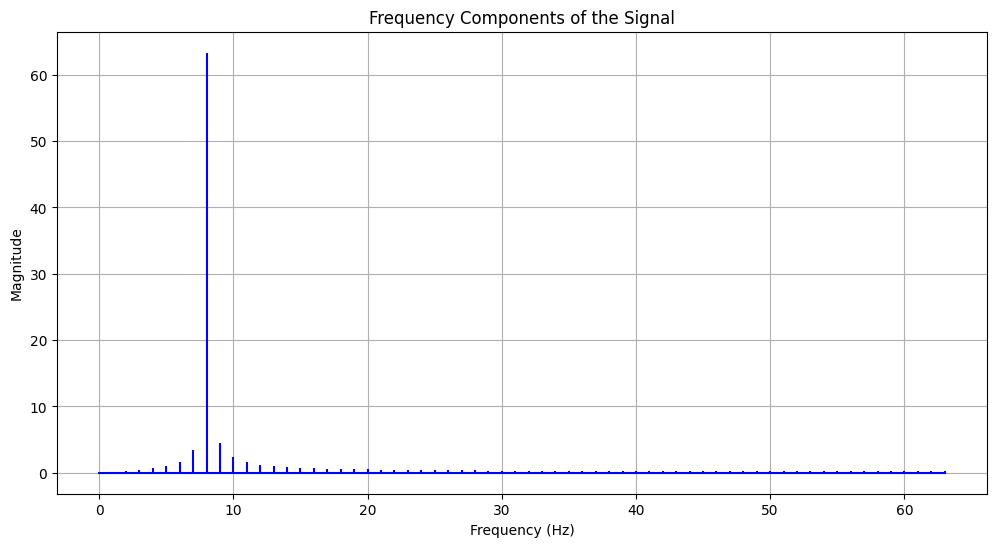

In [6]:
fft_result = np.fft.fft(input_sequence)
N = len(input_sequence)
sr = 128
T = 1/sr
# Compute the frequency bins
freqs = np.fft.fftfreq(N, T)

# Get the magnitude (absolute value) of the complex FFT results
magnitude = np.abs(fft_result)

# Plot using a stem plot
plt.figure(figsize=(12, 6))
plt.stem(freqs[:N // 2], magnitude[:N // 2], 'b', markerfmt=" ", basefmt="-b")
plt.title('Frequency Components of the Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()

#### Encrypted Fast Fourier Transform (FFT) with VENumpy
The cells below demonstrate an implementation of the Fast Fourier Transform (FFT) algorithm for encrypted data using the VENumpy library. VENumpy provides functionalities for homomorphic encryption, allowing computations on encrypted data without decryption.

#### Homomorphic Encryption and FFT:

The traditional FFT algorithm involves complex number computations. This implementation utilizes VENumpy's homomorphic encryption to perform these computations on encrypted real and imaginary components of the input data.

In [7]:
# Example usage
# Input_sequence = [1, 0, -1, 0]
encrypted_input = [ctx.encrypt(val) for val in input_sequence]

# Perform the encrypted FFT
encrypted_Result = phineus_FFT.FFT(ctx, encrypted_input, pad_data=True, window_data=True)

In [9]:
# Decrypt the result for verification
decrypted_result = [(ctx.decrypt(x[0]), ctx.decrypt(x[1])) for x in encrypted_Result]

complex_decrypted = [complex(ctx.decrypt(x[0]), ctx.decrypt(x[1])) for x in encrypted_Result]
# print(decrypted_result)
# print(complex_decrypted)

#### VENumpy FFT Plot

The plot below visualizes the real and imaginary components of the decrypted Fast Fourier Transform (FFT) result. The FFT decomposes a signal (represented by the input sequence) into its constituent frequency components.

* **Real Component:** The blue line represents the real part of the decrypted complex numbers obtained from the FFT. This component reflects the cosine-like contributions of each frequency to the original signal.
* **Imaginary Component:** The orange line represents the imaginary part of the decrypted complex numbers. This component reflects the sine-like contributions of each frequency to the original signal.

By analyzing the magnitudes and relative positions of peaks and troughs in both real and imaginary components, we can gain insights into the dominant frequencies present in the original signal.

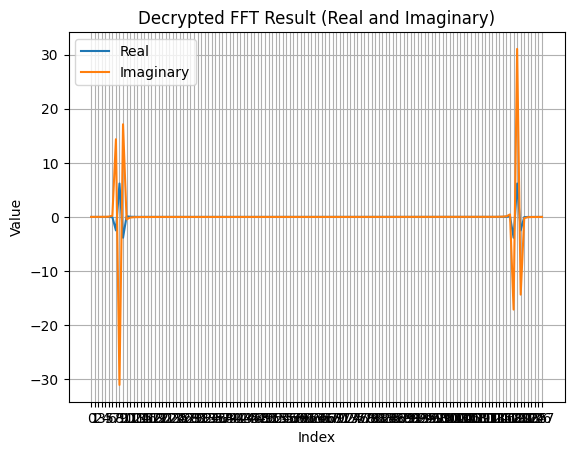

In [10]:
# Separate real and imaginary parts from decrypted complex numbers
decrypted_real = [x.real for x in complex_decrypted]
decrypted_imag = [x.imag for x in complex_decrypted]

# Plot real and imaginary parts separately
plt.plot(decrypted_real, label='Real')
plt.plot(decrypted_imag, label='Imaginary')

# Customize the plot for clarity
plt.xlabel("Index")
plt.ylabel("Value")
title = "Decrypted FFT Result (Real and Imaginary)"  
plt.title(title)
plt.xticks(np.arange(len(decrypted_result)))  # Set x-ticks for each element
plt.grid(True)  # Add grid for better visualization
plt.legend()  # Add legend for real and imaginary parts

plt.show()

In [11]:
sr = len(input_sequence)
print(sr)

128


In [12]:
frequencies = phineus_FFT.rfftfreq(len(encrypted_Result), 1/sr)
print(frequencies)
magnitudes = [(real**2 + imag**2) for real, imag in encrypted_Result]

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53.
 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64.]


In [13]:
# Extract the frequencies and their corresponding magnitudes
results = [(freq, magnitude) for freq, magnitude in zip(frequencies, magnitudes)]

In [14]:
decrypted_magnitudes = [np.sqrt(ctx.decrypt(m) )for m in magnitudes]

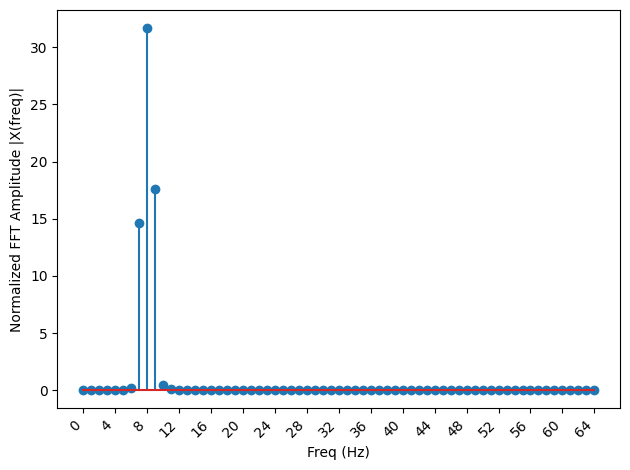

In [15]:
plt.stem(frequencies, decrypted_magnitudes[:len(frequencies)])
plt.xlabel('Freq (Hz)')
plt.ylabel('Normalized FFT Amplitude |X(freq)|')

# Set x-ticks to show every 2nd value and rotate them
plt.xticks(frequencies[::4])
plt.setp(plt.gca().get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()